# TP 2
Author : MARZAT Noé

## 1. Tests sur les SIFTs

In [1]:
# Imports 

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
i1 = cv.imread("img-tp2/sift1.jpg")
i2 = cv.imread("img-tp2/sift2.jpg")

img1 = cv.cvtColor(i1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(i2, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()

k_1, des_1 = sift.detectAndCompute(img1, None)
k_2, des_2 = sift.detectAndCompute(img2, None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(des_1, des_2)
matches = sorted(matches, key=lambda x: x.distance)
img3 = cv.drawMatches(img1, k_1, img2, k_2, matches[:50], img2, flags=2)


# cv.imshow("Output", img3)
# cv.waitKey(0)
# cv.destroyAllWindows()

## 2. Points de Moravec

/tmp/ipykernel_22045/2911873438.py:22: RuntimeWarning: invalid value encountered in cast
  corners[y, x] = M.sum()


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


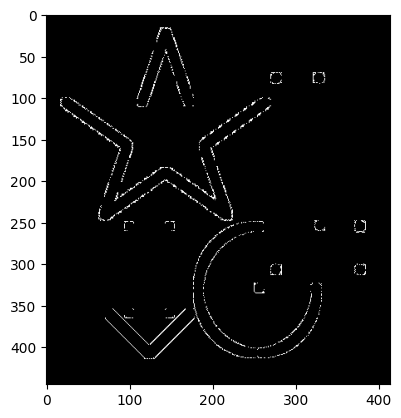

In [15]:
image = cv.imread("img-tp2/TP02I01.bmp")

corners = []
xy_shifts = [(1, 0), (1, 1), (0, 1), (-1, 1)]
threshold = 100

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
Ix = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=11)
Iy = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=11)

corners = np.zeros_like(gray)
    
for y in range(1, gray.shape[0]-1):
    for x in range(1, gray.shape[1]-1):
        M = np.zeros((3,3))
        for i in range(-1, 2):
            for j in range(-1, 2):
                Ix2 = Ix[y+i, x+j] ** 2
                Iy2 = Iy[y+i, x+j] ** 2
                M[i+1, j+1] = np.minimum(Ix2, Iy2)
        corners[y, x] = M.sum()

corners = corners > threshold
plt.imshow(corners, cmap='gray')
plt.show()